## Testing Python Tools for importing GPR Data

#### Here we tested diffrent import tools for sgy data to import in Python and trying to recreate the Radargramm  
- Chapter 1: Testing obspy
- Chapter 2: Testing segyio
- Chapter 3: Testing if Data 3D, Pseudo 3D, 2D
- Chapter 4: Ploting Radargramms

### Chapter 1: obspy

##### First we try to load the sgy files
**Note: We had to manaully upload the sgy files because some are to large to handle for GitHub** \
That the code works it is best to upload the File into the Folder **Data/Testdata/Files**

In [2]:
#Importing used Packages to load the File
import sys
from pathlib import Path

#Setting Working directory
sys.path.append(str(Path.cwd().parent))

#Import the config file so that only the Filename needs to be changed in the _read_segy function
from config import *

from obspy.io.segy.segy import _read_segy

# load segy
st = _read_segy(TEST_FILE_DIR / "UG3DQUERUNTERZUG.SGY")







#### Get Binary Header information
.....Explaination pending

In [2]:
binary_header = st.binary_file_header
print(binary_header)

Binary File Header:
	job_identification_number: 0
	line_number: 0
	reel_number: 0
	number_of_data_traces_per_ensemble: 1
	number_of_auxiliary_traces_per_ensemble: 0
	sample_interval_in_microseconds: 49
	sample_interval_in_microseconds_of_original_field_recording: 0
	number_of_samples_per_data_trace: 400
	number_of_samples_per_data_trace_for_original_field_recording: 0
	data_sample_format_code: 3
	ensemble_fold: 1
	trace_sorting_code: 0
	vertical_sum_code: 0
	sweep_frequency_at_start: 0
	sweep_frequency_at_end: 0
	sweep_length: 0
	sweep_type_code: 0
	trace_number_of_sweep_channel: 0
	sweep_trace_taper_length_in_ms_at_start: 0
	sweep_trace_taper_length_in_ms_at_end: 0
	taper_type: 0
	correlated_data_traces: 0
	binary_gain_recovered: 0
	amplitude_recovery_method: 0
	measurement_system: 1
	impulse_signal_polarity: 0
	vibratory_polarity_code: 0
	unassigned_1: b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

#### Get Trace Header Information
....Explanation pending

In [3]:
st.traces[0].header


trace_sequence_number_within_line: 1
trace_sequence_number_within_segy_file: 1
original_field_record_number: 1
trace_number_within_the_original_field_record: 1
energy_source_point_number: 1
ensemble_number: 1
trace_number_within_the_ensemble: 0
trace_identification_code: 1
number_of_vertically_summed_traces_yielding_this_trace: 0
number_of_horizontally_stacked_traces_yielding_this_trace: 0
data_use: 0
distance_from_center_of_the_source_point_to_the_center_of_the_receiver_group: 0
receiver_group_elevation: 0
surface_elevation_at_source: 0
source_depth_below_surface: 0
datum_elevation_at_receiver_group: 0
datum_elevation_at_source: 0
water_depth_at_source: 0
water_depth_at_group: 0
scalar_to_be_applied_to_all_elevations_and_depths: 1
scalar_to_be_applied_to_all_coordinates: 1
source_coordinate_x: 0
source_coordinate_y: 0
group_coordinate_x: 0
group_coordinate_y: 0
coordinate_units: 0
weathering_velocity: 0
subweathering_velocity: 0
uphole_time_at_source_in_ms: 0
uphole_time_at_group_in_m

#### Generate a csv File with the Inlines and Crosslines
This makes it easier to Plot afterwards the Radargramms and also its easier to acces the Information

In [3]:
import pandas as pd
rows= []

for i, trace in enumerate(st.traces):
    number = st.traces[i].header.trace_sequence_number_within_segy_file
    amp = st.traces[i].data
    inl = st.traces[i].header.for_3d_poststack_data_this_field_is_for_in_line_number
    cross = st.traces[i].header.for_3d_poststack_data_this_field_is_for_cross_line_number
    rows.append({
        "trace": number,
        "inline": inl,
        "crossline": cross,
        "Amplitude": amp
    })
df = pd.DataFrame(rows)
#df.to_csv("inline_crossline_obspy.csv", index =False)
print(df.head())




   trace  inline  crossline                                          Amplitude
0      1       1          1  [-20228, -14833, -12170, -9433, -11480, -12543...
1      2       1          2  [-19524, -15504, -13631, -10211, -10939, -1103...
2      3       1          3  [-18915, -16373, -15126, -10702, -10026, -9497...
3      4       1          4  [-18675, -16565, -15221, -10267, -9359, -9442,...
4      5       1          5  [-17714, -17046, -16254, -10498, -8612, -8687,...


## Chapter 2 Segyio package
we make the exact same steps as with the obspy package

##### First we try to load the sgy files

In [2]:
import segyio
#Importing used Packages to load the File
import sys
from pathlib import Path

#Setting Working directory
sys.path.append(str(Path.cwd().parent))

#Import the config file so that only the Filename needs to be changed in the _read_segy function
from config import *

In [3]:
filename = TEST_FILE_DIR / "EG-3D QUER001.SGY"
f = segyio.open(filename,"r", ignore_geometry=True)



#### Lets try again printing the binary header

In [15]:
print(f.bin)

{JobID: 0, LineNumber: 0, ReelNumber: 0, Traces: 1, AuxTraces: 0, Interval: 49, IntervalOriginal: 0, Samples: 400, SamplesOriginal: 0, Format: 3, EnsembleFold: 1, SortingCode: 0, VerticalSum: 0, SweepFrequencyStart: 0, SweepFrequencyEnd: 0, SweepLength: 0, Sweep: 0, SweepChannel: 0, SweepTaperStart: 0, SweepTaperEnd: 0, Taper: 0, CorrelatedTraces: 0, BinaryGainRecovery: 0, AmplitudeRecovery: 0, MeasurementSystem: 1, ImpulseSignalPolarity: 0, VibratoryPolarity: 0, ExtAuxTraces: 0, ExtSamples: 0, ExtSamplesOriginal: 0, ExtEnsembleFold: 0, SEGYRevision: 0, SEGYRevisionMinor: 0, TraceFlag: 0, ExtendedHeaders: 0}


#### Now lets try again printing a trace header

Here it is more intuitie to intepret the Trace header because its more nice to read

In [76]:
print(f.header[0])

{TRACE_SEQUENCE_LINE: 1, TRACE_SEQUENCE_FILE: 1, FieldRecord: 1, TraceNumber: 1, EnergySourcePoint: 1, CDP: 1, CDP_TRACE: 0, TraceIdentificationCode: 1, NSummedTraces: 0, NStackedTraces: 0, DataUse: 0, offset: 0, ReceiverGroupElevation: 0, SourceSurfaceElevation: 0, SourceDepth: 0, ReceiverDatumElevation: 0, SourceDatumElevation: 0, SourceWaterDepth: 0, GroupWaterDepth: 0, ElevationScalar: 1, SourceGroupScalar: 1, SourceX: 0, SourceY: 0, GroupX: 0, GroupY: 0, CoordinateUnits: 0, WeatheringVelocity: 0, SubWeatheringVelocity: 0, SourceUpholeTime: 0, GroupUpholeTime: 0, SourceStaticCorrection: 0, GroupStaticCorrection: 0, TotalStaticApplied: 0, LagTimeA: 0, LagTimeB: 0, DelayRecordingTime: 0, MuteTimeStart: 0, MuteTimeEND: 0, TRACE_SAMPLE_COUNT: 400, TRACE_SAMPLE_INTERVAL: 49, GainType: 0, InstrumentGainConstant: 0, InstrumentInitialGain: 0, Correlated: 0, SweepFrequencyStart: 0, SweepFrequencyEnd: 0, SweepLength: 0, SweepType: 0, SweepTraceTaperLengthStart: 0, SweepTraceTaperLengthEnd: 0

#### We create also a CSV File

In [6]:

import numpy as np
import pandas as pd
rows= []

inlines   = f.attributes(segyio.TraceField.INLINE_3D)[:]
crosslines = f.attributes(segyio.TraceField.CROSSLINE_3D)[:]

for i in range(f.tracecount):
    amp = np.array(f.trace[i])
    inl = inlines[i]
    cross = crosslines[i]
    rows.append({
        "trace": i,
        "inline": inl,
        "crossline": cross,
        "Amplitude": amp
    })
df = pd.DataFrame(rows)
#df.to_csv("inline_crossline_segyio.csv", index =False)
print(df.head())


   trace  inline  crossline                                          Amplitude
0      0       0          1  [-3779, -4808, -5511, -5421, -7800, -8821, -89...
1      1       0          2  [-3556, -4759, -5628, -5542, -7783, -8609, -86...
2      2       0          3  [-3445, -4734, -5746, -5699, -7867, -8492, -83...
3      3       0          4  [-3323, -4768, -5893, -5817, -7865, -8306, -80...
4      4       0          5  [-3376, -4907, -6050, -5876, -7803, -8150, -78...


In [82]:
df.head(600)

,trace,inline,crossline,Amplitude
0,0,0,1,"[-3779, -4808, -5511, -5421, -7800, -8821, -89..."
1,1,0,2,"[-3556, -4759, -5628, -5542, -7783, -8609, -86..."
2,2,0,3,"[-3445, -4734, -5746, -5699, -7867, -8492, -83..."
3,3,0,4,"[-3323, -4768, -5893, -5817, -7865, -8306, -80..."
4,4,0,5,"[-3376, -4907, -6050, -5876, -7803, -8150, -78..."
...,...,...,...,...
595,595,0,596,"[-3975, -5371, -6119, -5583, -7428, -8206, -86..."
596,596,0,597,"[-3858, -5323, -6170, -5669, -7473, -8137, -84..."
597,597,0,598,"[-3800, -5251, -6132, -5676, -7483, -8102, -83..."
598,598,0,599,"[-3866, -5169, -5930, -5514, -7424, -8189, -85..."


## Chapter 3 Tesing if Data 3D, Pseudo 3D or 2D

what does a real 3D Dataset mean
- the crosslines in the Dataframe for each Line are repeating themselves and are not incremental

for example:

**3D Data**

| trace | inline | crossline | amplitude |
|--------|--------|-----------|-----------|
| 1      | 1      | 1         | ...       |
| 2      | 1      | 2         | ...       |
| 3      | 2      | 1         | ...       |
| 4      | 2      | 2         | ...       |


**Pseudo 3D**

| trace | inline | crossline | amplitude |
|--------|--------|-----------|-----------|
| 1      | 1      | 1         | ...       |
| 2      | 1      | 2         | ...       |
| 3      | 2      | 3         | ...       |
| 4      | 2      | 4         | ...       |


**2D Data**

| trace | inline | amplitude |
|--------|----------|-----------|
| 1      | 1        | ...       |
| 2      | 1    | ...       |
| 3      | 2    | ...       |
| 4      | 2    | ...       |


The Code below shows how we can test that


In [ ]:
# just that we not have to jump around too much - lets create df again segyio version
import numpy as np
rows= []

inlines   = f.attributes(segyio.TraceField.INLINE_3D)[:]
crosslines = f.attributes(segyio.TraceField.CROSSLINE_3D)[:]

for i in range(f.tracecount):
    amp = np.array(f.trace[i])
    inl = inlines[i]
    cross = crosslines[i]
    rows.append({
        "trace": i,
        "inline": inl,
        "crossline": cross,
        "Amplitude": amp
    })
df = pd.DataFrame(rows)
#df.to_csv("inline_crossline_segyio.csv", index =False)
print(df.head())

KeyboardInterrupt: 

In [15]:
# just that we not have to jump around too much - lets create df again obspy version
import pandas as pd


rows= []

for i, trace in enumerate(st.traces):
    number = st.traces[i].header.trace_sequence_number_within_segy_file
    amp = st.traces[i].data
    inl = st.traces[i].header.for_3d_poststack_data_this_field_is_for_in_line_number
    cross = st.traces[i].header.for_3d_poststack_data_this_field_is_for_cross_line_number
    rows.append({
        "trace": number,
        "inline": inl,
        "crossline": cross,
        "Amplitude": amp
    })
df = pd.DataFrame(rows)
df.to_csv("inline_crossline_obspy.csv", index =False)
print(df.head())

   trace  inline  crossline                                          Amplitude
0      1       1          1  [-20228, -14833, -12170, -9433, -11480, -12543...
1      2       1          2  [-19524, -15504, -13631, -10211, -10939, -1103...
2      3       1          3  [-18915, -16373, -15126, -10702, -10026, -9497...
3      4       1          4  [-18675, -16565, -15221, -10267, -9359, -9442,...
4      5       1          5  [-17714, -17046, -16254, -10498, -8612, -8687,...


In [17]:
## Testing if Data is 3D , Pseudo 3D, or 2d

#extracting unique inlines and crosslines
inlines = df["inline"].unique()
crosslines = df["crossline"].unique()
traces = df["trace"].unique()

#checking if data is 2D
is_2d = (len(inlines) == 1) or (len(crosslines) == 1)

    

#creating a pivot table
pivot = df.pivot_table(index="inline", columns="crossline", aggfunc="size", fill_value=0)

if is_2d:
    data_type = "2D"
elif len(traces) == len(crosslines):
    data_type = "Pseudo 3D"
else:
    data_type = "3D"

print(f"traces: {len(traces)} | number of inlines: {len(inlines)} | number of crosslines: {len(crosslines)}| data type: {data_type}")
print("----------------------------------- Pivot Table ----------------------------------------------------")
pivot


traces: 42660 | number of inlines: 60 | number of crosslines: 711| data type: 3D
----------------------------------- Pivot Table ----------------------------------------------------


crossline,1,2,3,4,5,6,7,8,9,10,...,702,703,704,705,706,707,708,709,710,711
inline,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
7,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
8,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
9,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


#### Plotting the GRID

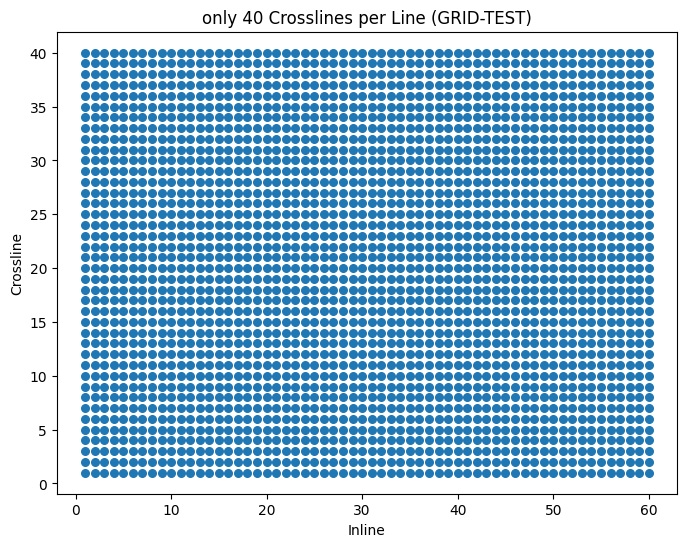

In [10]:
import matplotlib.pyplot as plt

cross = 40
df2 = df.sort_values(["inline", "crossline"]) \
        .groupby("inline") \
        .head(cross)

plt.figure(figsize=(8,6))
plt.scatter(df2["inline"], df2["crossline"], s=30)
plt.xlabel("Inline")
plt.ylabel("Crossline")
plt.title(f"only {cross} Crosslines per Line (GRID-TEST)")
plt.show()

## Chapter 4: Plotting Radargramms

#### Inline Radargramm
her we take one inline an Plot it

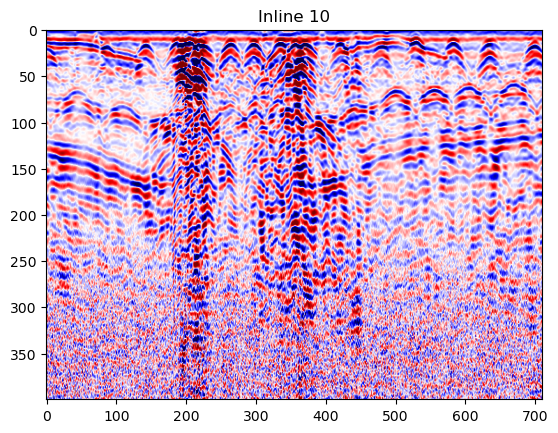

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_inline(df, inlinenr):
    
    
    sub = df[df["inline"] == inlinenr].sort_values("crossline")
    traces = np.vstack(sub["Amplitude"].values)
    img = traces.T

    #plt.figure(figsize=(10, 5))
    plt.imshow(img, cmap="seismic", aspect="auto", origin="upper")
    plt.title(f"Inline {inlinenr}")
    #plt.xlabel("Crossline")
    #plt.ylabel("Time sample")
    plt.show()


plot_inline(df, 10)

#### Crossline radargram
so here we take one crossline and plot the Radargramm

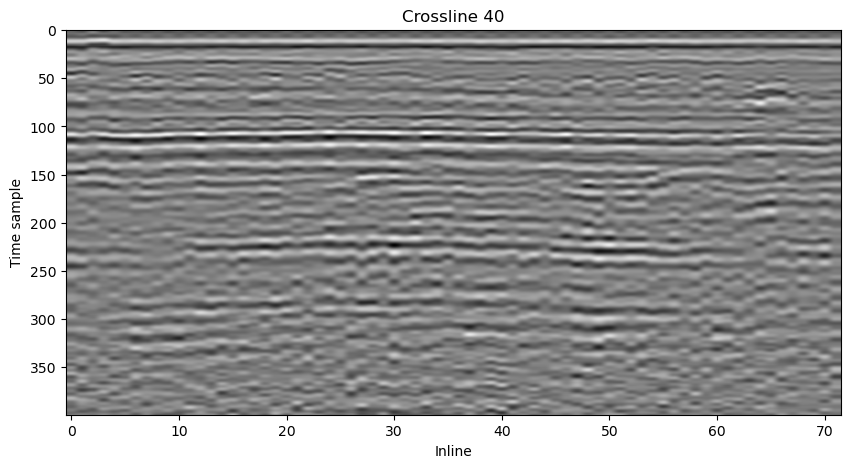

In [8]:
def plot_crossline(df, cross_nr):
    sub = df[df["crossline"] == cross_nr].sort_values("inline")
    traces = np.vstack(sub["Amplitude"].values)
    img = traces.T

    plt.figure(figsize=(10, 5))
    plt.imshow(img, cmap="gray", aspect="auto", origin="upper")
    plt.title(f"Crossline {cross_nr}")
    plt.xlabel("Inline")
    plt.ylabel("Time sample")
    plt.show()

plot_crossline(df, 40)

#### Ploting time Slice
here we take a time and Plot it its the top down view

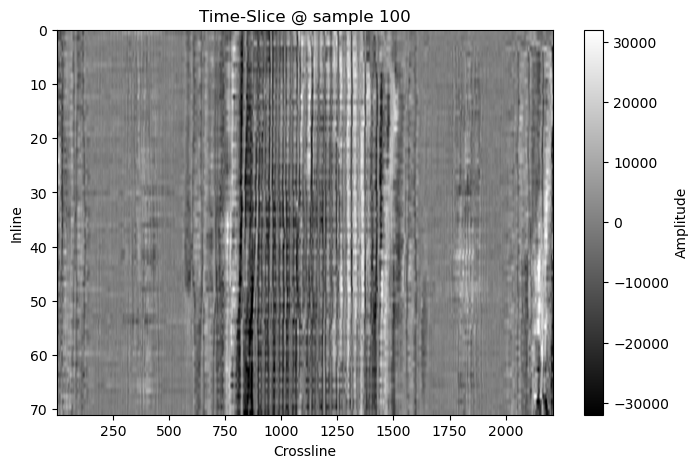

In [9]:
def plot_timeslice(df, sample_index):
    inlines = np.sort(df["inline"].unique())
    crosslines = np.sort(df["crossline"].unique())
    mat = np.full((len(inlines), len(crosslines)), np.nan)

    il_map = {v:i for i,v in enumerate(inlines)}
    cl_map = {v:i for i,v in enumerate(crosslines)}

    for _, row in df.iterrows():
        i = il_map[row["inline"]]
        j = cl_map[row["crossline"]]
        mat[i, j] = row["Amplitude"][sample_index]

    plt.figure(figsize=(8,5))
    plt.imshow(np.nan_to_num(mat), cmap="gray", aspect="auto",
               extent=[crosslines.min(), crosslines.max(), inlines.max(), inlines.min()])
    plt.title(f"Time-Slice @ sample {sample_index}")
    plt.xlabel("Crossline")
    plt.ylabel("Inline")
    plt.colorbar(label="Amplitude")
    plt.show()

plot_timeslice(df, 100)

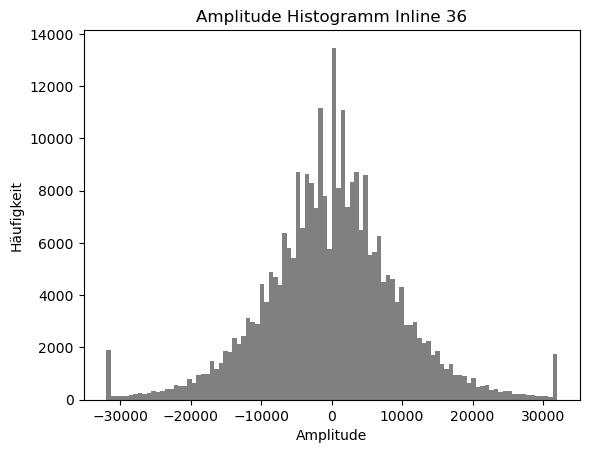

In [11]:
import matplotlib.pyplot as plt
import numpy as np



sub = df[df["inline"] == 10]  # Inline 36 auswählen
amp_values = np.concatenate(sub["Amplitude"].values)  # alle Traces zusammen

plt.hist(amp_values, bins=100, color="gray")
plt.xlabel("Amplitude")
plt.ylabel("Häufigkeit")
plt.title("Amplitude Histogramm Inline 36")
plt.show()

